### 1 - Mammifère - Nb entités = 18
### 2 - Oiseau - Nb entités = 20
### 3 - Reptile - Nb entités = 8
### 4 - Poisson - Nb entités = 15
### 5 - Amphibie - Nb entités = 12
### 6 - Insecte - Nb entités = 17
### 7 - Invertébré - Nb entités = 10


# IMPORTS

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


# Création du DataFrame

In [2]:
df=pd.read_csv('zoo.csv') # Permet de lire un fichier csv et d'en créer un DataFrame

# Affichage des 10 premières lignes du dataframe

In [3]:
df.head(10) # Permet d'afficher les 10 premières ligne du DataDrame

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,turtle,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,3
1,chameleon,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
2,iguana,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1,3
3,lizard,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
4,gecko,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
5,python,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3
6,boa,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,3
7,adder,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3
8,crocodile,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3
9,alligator,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3


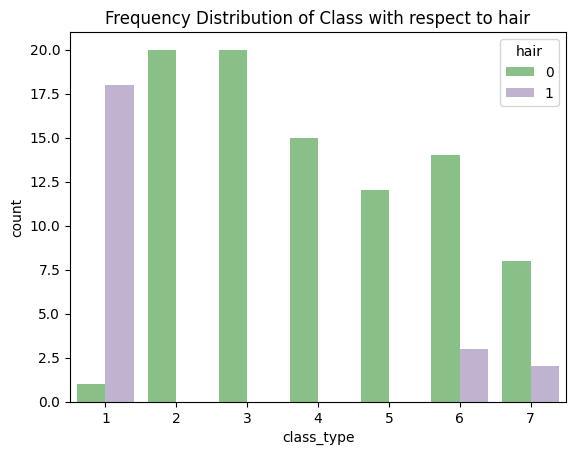

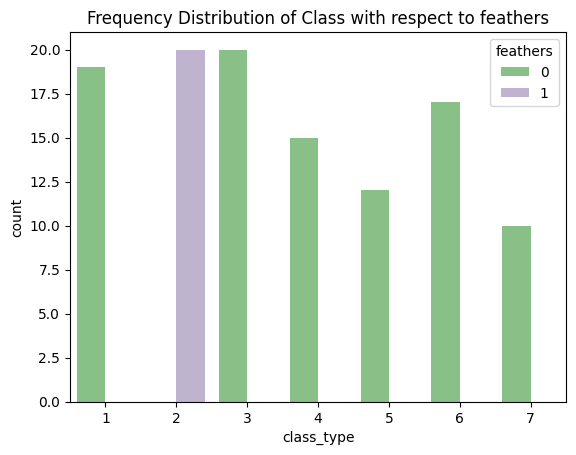

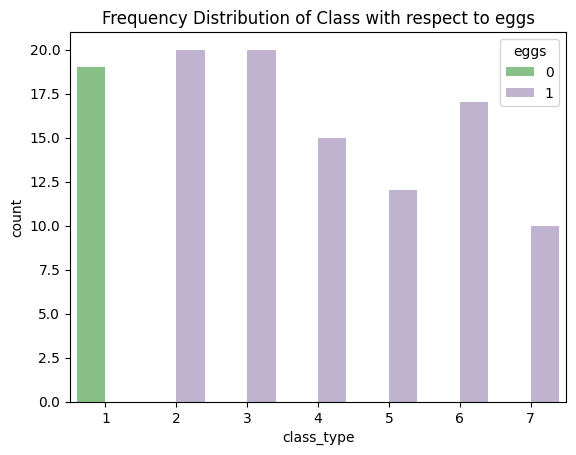

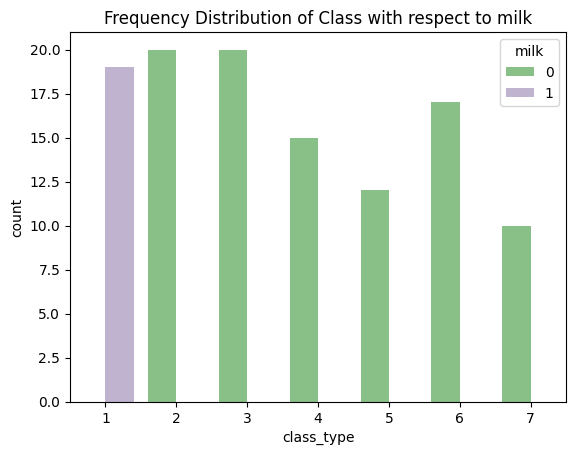

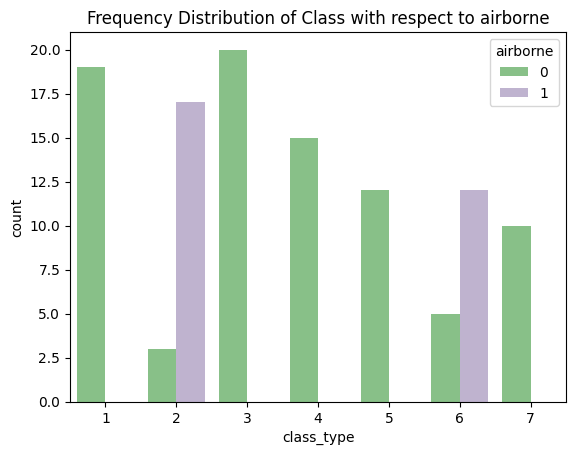

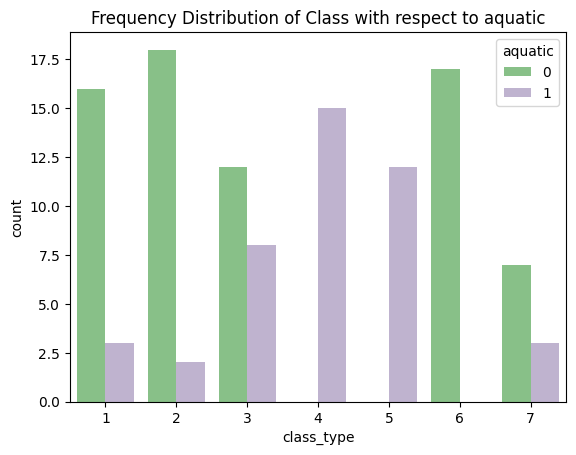

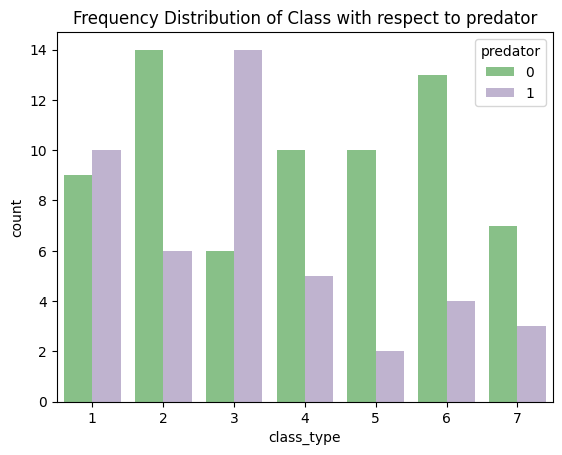

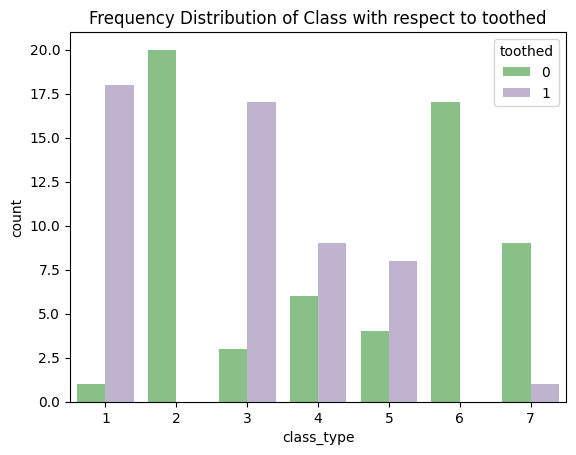

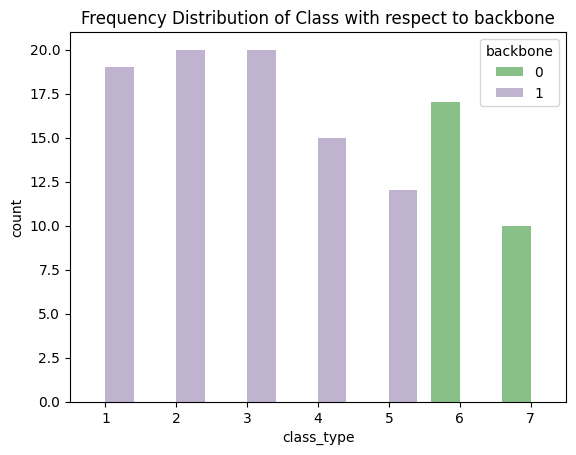

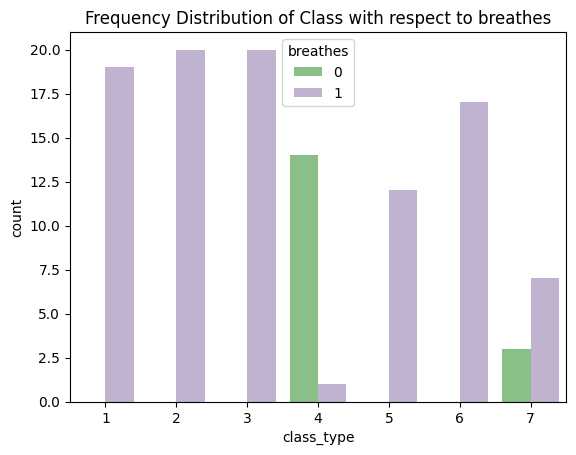

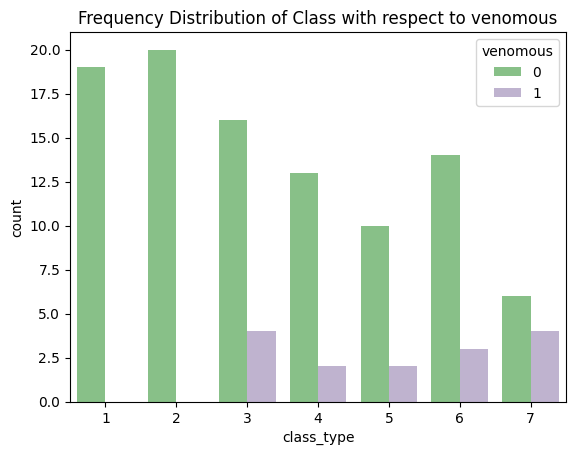

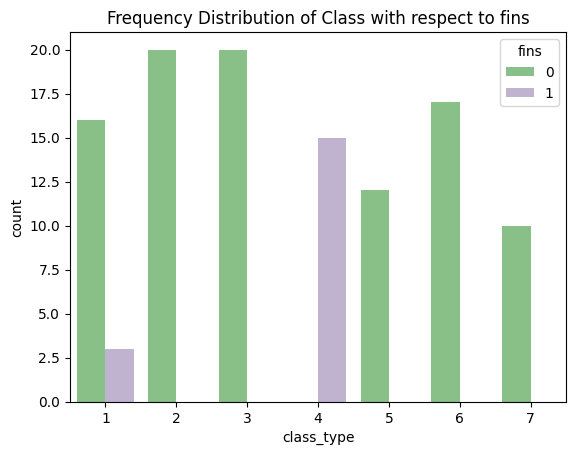

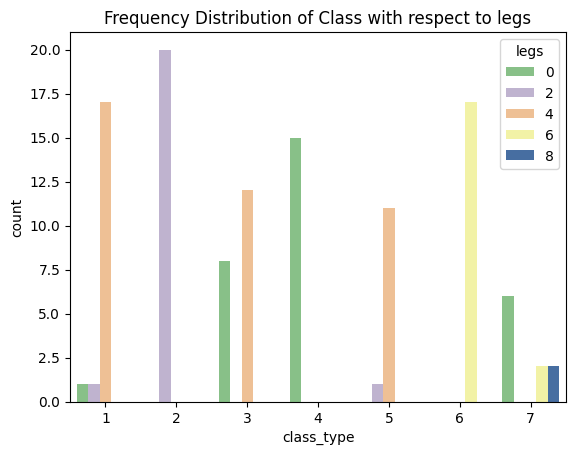

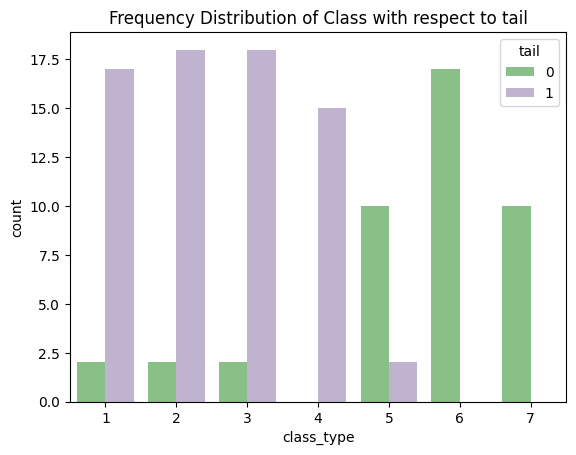

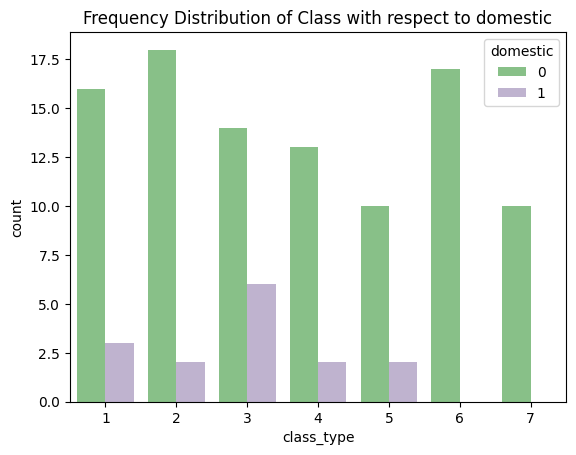

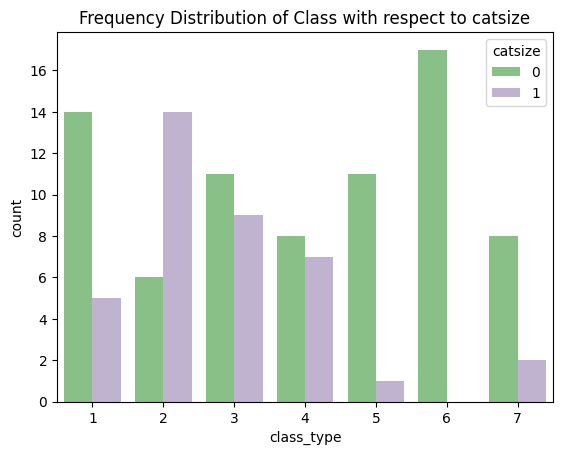

In [4]:
for i in ['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize']: # On parcours toute les catégories
    sns.countplot(data = df, x = "class_type", hue = i, palette = "Accent")
    plt.title(f"Frequency Distribution of Class with respect to {i}")
    plt.show()

# On récupère des collonnes du dataframes

In [17]:
a = df.loc[:, "eggs"]
b = df.loc[:, "aquatic"]
c = df.loc[:, "legs"]
d = df.loc[:, "tail"]
e = df.loc[:, "domestic"]
f = df.loc[:, "breathes"]
g = df.loc[:, "predator"]


#c = df.loc[:, "animal_name"]

# Initialisation de X et Y pour split nos données

In [25]:
x = list(zip(a,b,c,d))
y=df['class_type']

# On split nos données, pour l'entrainement et pour le test

In [26]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

# Entrainement de notre arbre de décision 

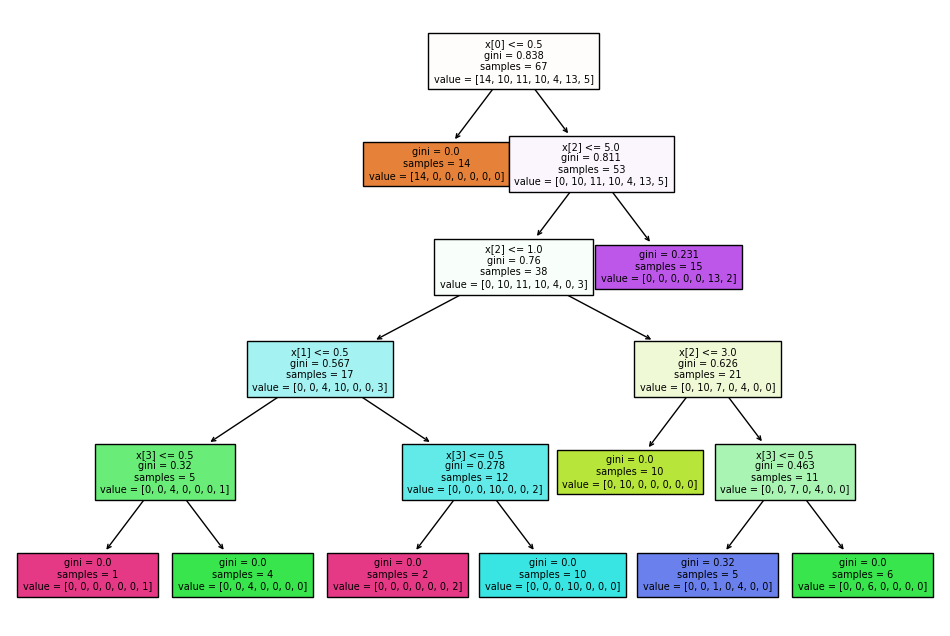

In [28]:
# Fitting Random Forest Classification to the Training set
classifier = tree.DecisionTreeClassifier(criterion="gini",
                                           #class_weight={1:3, 2:3, 3:1, 4:2, 5:2, 6:3, 7:2}
                                           )
fitResult = classifier.fit(X_train, y_train)

# On peut visualiser l'arbre de decision
plt.figure(figsize=(12,8))
_ = tree.plot_tree(fitResult, filled=True, fontsize=7)

# Visualisation de l'abre après l'entrainement

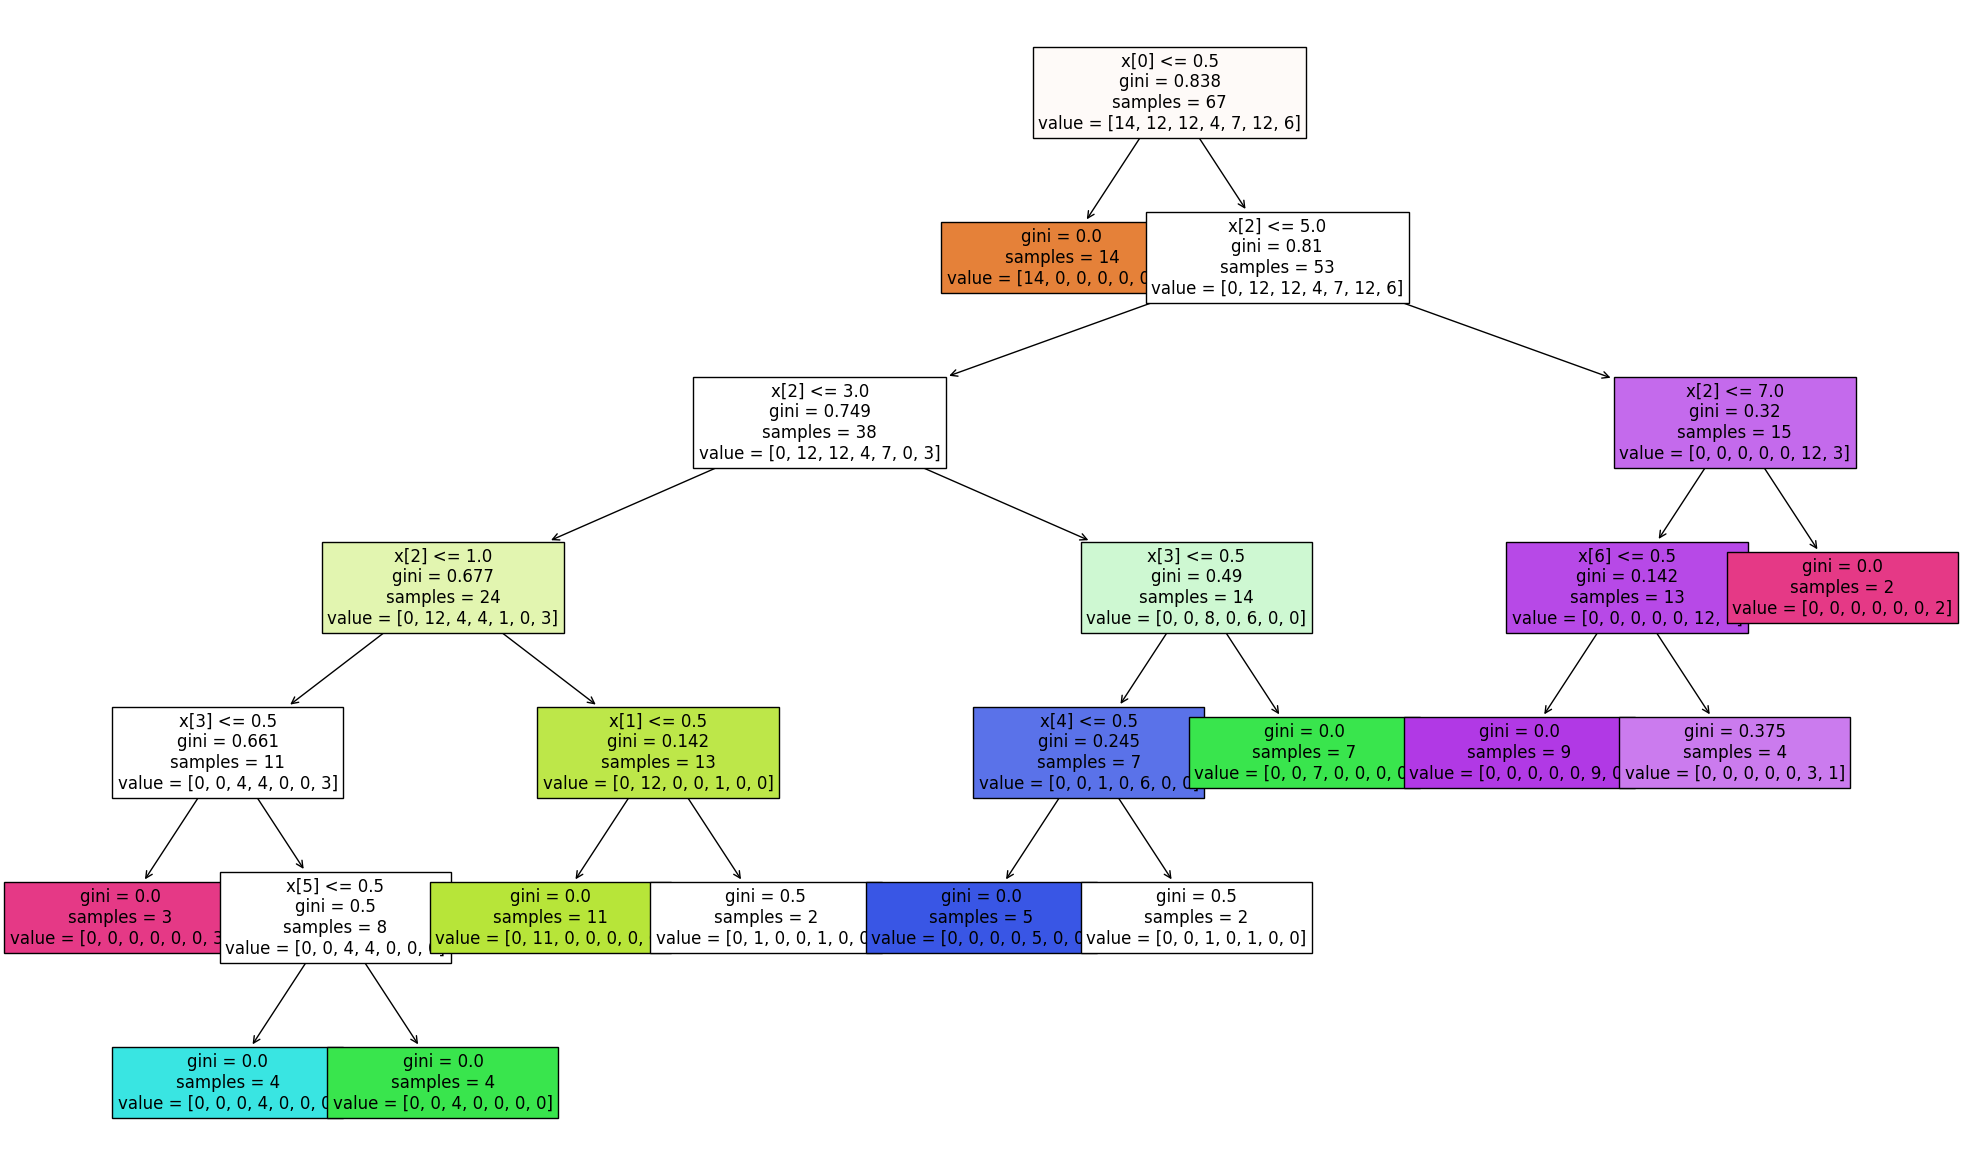

In [9]:
# On peut visualiser l'arbre de decision
plt.figure(figsize=(25,15))
_ = tree.plot_tree(fitResult, filled=True, fontsize=12)

# Permet de connaître le score / prédiction avec nos données de test

In [10]:
score = classifier.score(X_test, y_test)
print('Voici le pourcentage de réussite de notre DecisionTreeClassifier : ' + str(int(score*100)) + '%')

# OR

# Predicting a new result
# y_pred=classifier.predict(X_test)
# acc = accuracy_score(y_test, y_pred)
# acc

Voici le pourcentage de réussite de notre DecisionTreeClassifier : 93%


In [11]:
moyenne = 0
iteration = 30
for i in range(iteration):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)
    # Fitting Random Forest Classification to the Training set
    classifier = tree.DecisionTreeClassifier(criterion="entropy",
                                            #class_weight={1:3, 2:3, 3:1, 4:2, 5:2, 6:3, 7:2}
                                            )
    fitResult = classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    moyenne = moyenne + int((score*100))
    print('Voici le pourcentage de réussite de notre DecisionTreeClassifier : ' + str(int(score*100)) + '%')
print("Moyenne sur " + str(iteration) + " itérations : " + str(int(moyenne/iteration)) + "%")

Voici le pourcentage de réussite de notre DecisionTreeClassifier : 89%
Voici le pourcentage de réussite de notre DecisionTreeClassifier : 78%
Voici le pourcentage de réussite de notre DecisionTreeClassifier : 91%
Voici le pourcentage de réussite de notre DecisionTreeClassifier : 89%
Voici le pourcentage de réussite de notre DecisionTreeClassifier : 93%
Voici le pourcentage de réussite de notre DecisionTreeClassifier : 93%
Voici le pourcentage de réussite de notre DecisionTreeClassifier : 95%
Voici le pourcentage de réussite de notre DecisionTreeClassifier : 93%
Voici le pourcentage de réussite de notre DecisionTreeClassifier : 86%
Voici le pourcentage de réussite de notre DecisionTreeClassifier : 80%
Voici le pourcentage de réussite de notre DecisionTreeClassifier : 86%
Voici le pourcentage de réussite de notre DecisionTreeClassifier : 89%
Voici le pourcentage de réussite de notre DecisionTreeClassifier : 95%
Voici le pourcentage de réussite de notre DecisionTreeClassifier : 89%
Voici 

# Avec un randomForest

In [12]:
# Plus n_estimators grand, plus le modèle apprends vite ? A vérifier
# n_estimators = nb d'arbre

for d in range (2,30):
    classifier = RandomForestClassifier(n_estimators=3 ,criterion="entropy", max_depth=d)
    classifier = classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    print('Profondeur RF : '+str(d)+'\tExactitude  '+str(score))
    # Décommenter si on veut voir tout les graphs à toutes les étapes
    # plt.figure(figsize=(25,8))
    # _ = tree.plot_tree(classifier.estimators_[0], filled=True, fontsize=12)

Profondeur RF : 2	Exactitude  0.6956521739130435
Profondeur RF : 3	Exactitude  0.7608695652173914
Profondeur RF : 4	Exactitude  0.8260869565217391
Profondeur RF : 5	Exactitude  0.9130434782608695
Profondeur RF : 6	Exactitude  0.9347826086956522
Profondeur RF : 7	Exactitude  0.9130434782608695
Profondeur RF : 8	Exactitude  0.8913043478260869
Profondeur RF : 9	Exactitude  0.9565217391304348
Profondeur RF : 10	Exactitude  0.8695652173913043
Profondeur RF : 11	Exactitude  0.9130434782608695
Profondeur RF : 12	Exactitude  0.9347826086956522
Profondeur RF : 13	Exactitude  0.9347826086956522
Profondeur RF : 14	Exactitude  0.8913043478260869
Profondeur RF : 15	Exactitude  0.8913043478260869
Profondeur RF : 16	Exactitude  0.9565217391304348
Profondeur RF : 17	Exactitude  0.9347826086956522
Profondeur RF : 18	Exactitude  0.8913043478260869
Profondeur RF : 19	Exactitude  0.9565217391304348
Profondeur RF : 20	Exactitude  0.9130434782608695
Profondeur RF : 21	Exactitude  0.8913043478260869
Profonde